# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

import numpy as np
from collections import deque
import os
from shutil import copyfile
import pandas as pd

#from unityagents import UnityEnvironment
from IPython.display import display, Markdown, Latex

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
#env = UnityEnvironment(file_name="./data/Banana_Linux_NoVis/Banana.x86_64")
#env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
"""
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
"""

'\nenv_info = env.reset(train_mode=False)[brain_name] # reset the environment\nstate = env_info.vector_observations[0]            # get the current state\nscore = 0                                          # initialize the score\nwhile True:\n    action = np.random.randint(action_size)        # select an action\n    env_info = env.step(action)[brain_name]        # send the action to the environment\n    next_state = env_info.vector_observations[0]   # get the next state\n    reward = env_info.rewards[0]                   # get the reward\n    done = env_info.local_done[0]                  # see if episode has finished\n    score += reward                                # update the score\n    state = next_state                             # roll over the state to next time step\n    if done:                                       # exit loop if episode finished\n        break\n    \nprint("Score: {}".format(score))\n'

When finished, you can close the environment.

In [7]:
# env.close()

In [8]:
# !{sys.executable} -m pip install -U git+https://github.com/szagoruyko/pytorchviz

In [9]:
import sys
!{sys.executable} -m pip install -U git+https://github.com/szagoruyko/pytorchviz
!{sys.executable} -m pip install -U torchsummary

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-_h72d_7f
  Running setup.py bdist_wheel for torchviz ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-ol3xdvps/wheels/b9/b9/85/ef34936f58754cb23840fd869be1367b5d525e29915a2a4fe9
Successfully built torchviz


# 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
---------------------------------------------------------------------
```













```

# Neural networks

In this project, we'll make use of 2 neural networks
- A simple feed forward neural network (2 hidden layers)
- A dualing feed forward neural network (4 hidden layers)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]           2,112
            Linear-2                [-1, 1, 32]           2,080
            Linear-3                [-1, 1, 37]           1,221
Total params: 5,413
Trainable params: 5,413
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


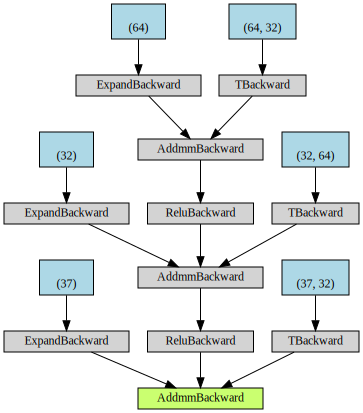

In [10]:
from model.qNetwork import QNetwork
QNetwork(state_size, action_size,0).show_model_info()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]           2,432
            Linear-2               [-1, 1, 128]           8,320
            Linear-3                [-1, 1, 64]           8,256
            Linear-4                [-1, 1, 32]           2,080
            Linear-5                 [-1, 1, 1]              33
            Linear-6                 [-1, 1, 4]             132
Total params: 21,253
Trainable params: 21,253
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.08
Estimated Total Size (MB): 0.08
----------------------------------------------------------------


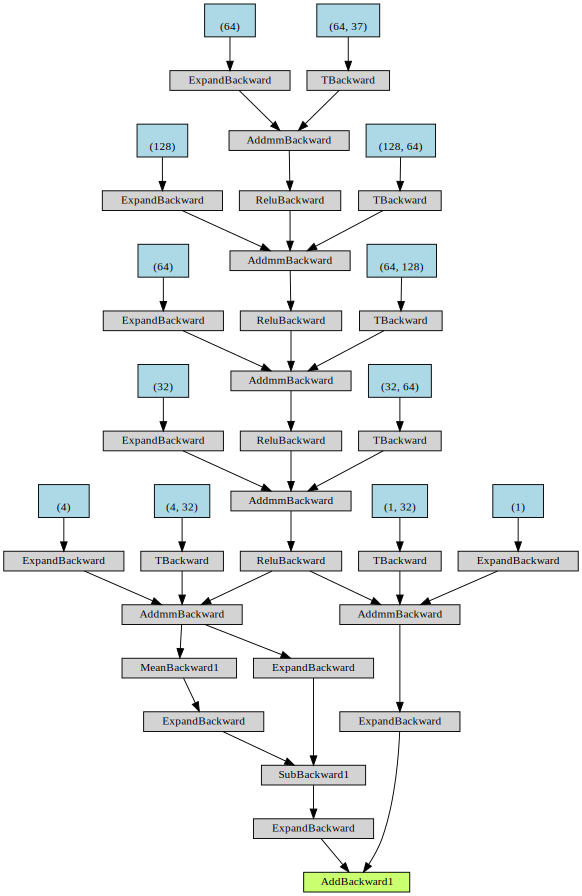

In [11]:
from model.duelingQNetwork import DuelingQNetwork
DuelingQNetwork(state_size, action_size,0).show_model_info()

# (Prioritized Experience) ReplayBuffer
In this project, we'll make use of a (Prioritized Experience) ReplayBuffer.  
Basically it is a pool of records with size N from which we'll sample.  

The (Prioritized Experience) ReplayBuffer, which i'll use contains out of 3 objects:
 - A record
 - A queue
 - A Replay Buffer

## Record
The record is the lowest level in our Replay Buffer. It represents an item in a list.  
Each item contains the next attributes:
 - state
 - action
 - reward
 - next_state
 - done

Extra parameters:
 - delta
 
### Delta
Delta is the basis value to prioritize the records in our Replay Buffer.  
Delta itself, is the absolute difference between the expected value and predicted value.  
If both values differ a lot from each other then we might want to give that record a higher probability to be sampled  
(in comparison, we don't want to waste time on records where the predicted value is near the expected value)

### importance_sampling_weight
A weight which we'll use during training
        

### Example of a record & prioritize_perc

In [12]:
# example record:
from model.queue import Record

record = Record(state = 1, action = 2, reward = 3, next_state = 4, done = 5, delta = 0.3)
record.__dict__

{'state': 1,
 'action': 2,
 'reward': 3,
 'next_state': 4,
 'done': 5,
 'delta': 0.3,
 'importance_sampling_weight': 0}

## Queue

Queue is a list of records with a maximum size N  
The Queue is responsable for:
 - Storing records in its memory
 - Maniging the sum of deltas (denominator)
 - Returning a sample (with or without respect to the delta values)
 - calculating the importance_sampling_weight
 
Parameters:
 - buffer_size: the maximum size of a queue
 - min_prob: a small value, to avoid that we have 0
 


## Get_sample( sample_size, prioritize_perc, importance_sampling_weight_perc)
Get_sample is a method, which will return a sample back from the queue  
If the **queue_size < sample_size**, we'll return everything everything back  
Else we will return N samples back, where N equals the batch size.  


Also if the supplied **prioritize_perc** value > 0, then we will sample from an uniform distribution  
otherwise, we'll sample with respect to delta  
(records which were trained before and differed a lot from the expected value, will have now a larger probability)
 - If prioritize_perc == 0 then: Each record has an equal chance to be sampled
 - If prioritize_perc == 1 then: we'll sample with respect to the delta value
              
Last but not least, we'll update the record's **importance sampling weight**.  
This controls the impact during learning.  
Basically, records which have a high probability, (and thus have a higher change to be sampled more often then other records) will have a lower weight | impact during the backpropagation phase! when the value goes to 1
 - If importance sampling weight == 0 then: each error weight is 1
 - If importance sampling weight == 1 then: the backpropagation impact of records with a high probabilty is less then records with a low probability
 
### min_prob
Each record contains a minimum probability, this prevent us from dividing by 0

### Calculating the probability
\begin{equation*}
p   = (delta + min\_prob)^{prioritize\_perc}
\end{equation*}
                 

In [13]:
# example record:
from model.queue import Queue

# qreate a queue with size 3
queue = Queue(buffer_size = 3, min_prob = 0.01)

# add 5 items to the queue
for i in range(5):
    record = Record(state = i, action = i, reward = i, next_state = i, done = i, delta = i)
    queue.add_record(record)

print('##########################')
print('# Current queue records: #')
print('##########################')
for q in queue.queue:
    print(q.__dict__)
    

print('\n\n###############')
print('# Experimants #')
print('###############')
print('------- Edit the delta values ---')
# re arrange the delta values
record = queue.queue[0]
record.set_delta(0.4)

record = queue.queue[1]
record.set_delta(0)

record = queue.queue[2]
record.set_delta(0.1)

for q in queue.queue:
    print(q.__dict__)
    
print('\n\n###########################################################')
print('# Impact, prioritize_perc, importance_sampling_weight_perc#')
print('###########################################################')
print(f'-- Get 2 samples, prioritize_perc= 0,  importance_sampling_weight_perc= 0):')
print("- prioritize_perc= 0: equal distribution: record with state 3 should be sampled")
print(" ")
for q in  queue.get_sample(sample_size= 2, prioritize_perc= 0, importance_sampling_weight_perc= 0):
    print(f'{q.__dict__}')
    
print(f'\n\n-- Get 2 samples, prioritize_perc= 1,  importance_sampling_weight_perc= 1):')
print("- prioritize_perc= 1: only records with state 2 and 4 should be visible")
print("- prioritize_perc= 0: The heigher the value of delta, the lower the value of importance_sampling_weight")
print(' ')
for q in queue.get_sample(sample_size= 2, prioritize_perc= 1, importance_sampling_weight_perc= 1):
    print(f'{q.__dict__}')
    

##########################
# Current queue records: #
##########################
{'state': 2, 'action': 2, 'reward': 2, 'next_state': 2, 'done': 2, 'delta': 2, 'importance_sampling_weight': 0}
{'state': 3, 'action': 3, 'reward': 3, 'next_state': 3, 'done': 3, 'delta': 3, 'importance_sampling_weight': 0}
{'state': 4, 'action': 4, 'reward': 4, 'next_state': 4, 'done': 4, 'delta': 4, 'importance_sampling_weight': 0}


###############
# Experimants #
###############
------- Edit the delta values ---
{'state': 2, 'action': 2, 'reward': 2, 'next_state': 2, 'done': 2, 'delta': 0.4, 'importance_sampling_weight': 0}
{'state': 3, 'action': 3, 'reward': 3, 'next_state': 3, 'done': 3, 'delta': 0, 'importance_sampling_weight': 0}
{'state': 4, 'action': 4, 'reward': 4, 'next_state': 4, 'done': 4, 'delta': 0.1, 'importance_sampling_weight': 0}


###########################################################
# Impact, prioritize_perc, importance_sampling_weight_perc#
#####################################

# ReplayBuffer

The replay buffer is the outher shell of our sampling pool.
it will:
 - create the queue
 - controll prioritization of the records
 - controll importance sampling weight
 - create batches 
 - handles the importance sampling weight decay 

parameters:
 - action size: Amount of actions which we can take (4: up, left, right, down)
 - Memory - buffer_size: The size of the buffer | QUEUE (e.g.: 1000 examples)
 - batch_size: The size of 1 Batch (whih contains random elements)
 - experience: A nicer way to use a n-tuple (Quintuple)
 
### add_record
 - add an example in to the Memory (QUEUE)
 
### sample( s)
 - Sample gives you the data back of 1 batch
 - In this case, Sample is a tuple of 5 elements and each element contains a tensor of size n (n == batch_size)
 - E.g.
     - (tensor([[ 7.], [ 9.],  [ 1.]]), # states  
        tensor([[ 7],  [ 9],   [ 1]]),  # actions  
        tensor([[ 0.], [ 10.], [  0.]]),# rewards  
        tensor([[ 8.], [ 10.], [  2.]]),# next_state  
        tensor([[ 0.], [ 1.],  [ 0.]]) )# dones  
        
 - Each sample will be taken randomly out of the memory queue.
  - This means that an instance can occure in multiple batches.
  - An instance | record will only be removed out of the memory queue when:
      - The queue has reached its maximum capacity (buffer size)
      - If this is the case it will remove the oldest record

In [14]:
#-----------------------#
# Test the ReplayBuffer #
#-----------------------#
from model.replayBuffer import ReplayBuffer
test_buffer = ReplayBuffer(action_size = 4, 
                           buffer_size = 10, 
                           batch_size = 3, 
                           seed = 0, 
                           importance_sampling_weight_perc= 1, 
                           prioritize_perc = 1)

for i in range(10):
    test_buffer.add_record(state = i, action=i, reward=0, next_state=i+1, done=0, delta = i+1/10)
else:
    test_buffer.add_record(state = i, action=i, reward=10, next_state=i+1, done=1, delta = i+1/10)
    
test_buffer.sample()

(tensor([[ 9.],
         [ 5.],
         [ 7.]]), tensor([[ 9],
         [ 5],
         [ 7]]), tensor([[ 10.],
         [  0.],
         [  0.]]), tensor([[ 10.],
         [  6.],
         [  8.]]), tensor([[ 1.],
         [ 0.],
         [ 0.]]), [<model.queue.Record at 0x7fe8c73cb4e0>,
  <model.queue.Record at 0x7fe8c73cb438>])

# Define the agent

## Steps:
 - **initialize an Agent: agent = Agent(state_size=state_size, action_size=action_size, seed=0)**
  - *Environment provides us a state*
 - **Given a state, get an action: action = __agent.act__(state, eps)**
  - *Perform the action in the environment & get the state, action, reward, next_state, done values back*
 - **Save the environment data in the buffer & update the NN: __agent.step__(state, action, reward, next_state, done)**
  - *update the old state  *
 ...  
 - **Given a state, get an action: action = __agent.act__(state, eps)**
  - *Perform the action in the environment & get the state, action, reward, next_state, done values back*
 - **Save the environment data in the buffer & update the NN: __agent.step__(state, action, reward, next_state, done)**
  - *update the old state*
  
  
## Initialize
 - state_size: The state in which we are ( variables of the parameters: 37 )
 - action_size: Amount of actions which we can take (4: up, left, right, down)

 - 2 Small neural nets
  - qnetwork_local: will be updated via backpropagation
  - qnetwork_target: will updated via qnetwork_local
  
 - memory | ReplayBuffer: a pool of previous experiences 
 
 - set the step to 0
 
## Step 1: act(state, eps=0.)
  #### epsilon:
  Epsilon is a number (between 0 and 1) which is responsable of taking random actions.  
  The value of epsilon will be compared with a random generated value (also between 0 and 1)   
  When the value of epsilon is larger then the random value, then we'll perform a random action  
  otherwise, we'll take the action with the highest probability.  
  Last but not least, in each step the value of epsilon might decrease a bit in such a way that we take  
  more random actions in the beginning and relay more on the network at the end.
  
  #### steps
  input: state
  
  - if a random number between 0 and 1, is smaller or equal then the epsilon value:  
    --> return a random action  
$$\frac{eps\_min}{eps\_max}^{\frac{episode\_nr}{episodes\_to\_min\_decay}}$$
  - Else, pass the given state trough the local q-network
  - get the probabilities of the possible actions, (from the network)
  - return the action with the highest probability
  
  
## Step 2: step(state, action, reward, next_state, done)
 
 Previously in step 1, we requested a (random) action from the agent.  
 And with this action we asked the environment for a reward value, a next_state and a done value,  
 given our current_state and action. Now in the second step, we'll
 - store the currente event into the replay memory buffer
   - state
   - action
   - reward
   - next_state
   - delta
    - Note that we aleady provide a small default delta value
 - Train the network each x steps
   - If there is enough data in the replay memory buffer
    - If so, go to Step 3
    
    
    
## Step 3: learn(experiences)
Train the model each x steps, if there are enough examples in our replay buffer.

- Get a batch of training records: states, actions, rewards, next_states, dones, records  
- Use a DQN network or a DDQN network to define the next Q targets.  
 - DQN: Select the max action value of the target value  
   e.g: for a batch (64 records ):  
         - Predict the action to undertake (64 X 4) (if we've 4 actions)  
        
         tensor([[ 0.1045, -0.0075, -0.2736,  0.1418],  
                 [ 0.1603, -0.0054,  0.1768,  0.1021],   
                 [ 0.1830, -0.0304, -0.1600,  0.1432],  
                 [ 0.1380,  0.0194, -0.1237,  0.0512]])  
        
         - Take the max value of each tensor (.max(1)) (of the TARGET NETWORK)
         (tensor([ 0.1418,  0.1768,  0.1830,  0.1380]), tensor([ 3,  2,  0,  0]))  
            
         Result : Grep the max value  
         Q_targets_next = tensor([[ 0.1418], [ 0.1768], [ 0.1830], [ 0.1380]])  
 - DDQN:  
   e.g.: for a batch (64 records ):  
            - Predict the action to undertake (64 X 4) (if we've 4 actions)  
            
             tensor([[ 0.1045, -0.0075, -0.2736,  0.1418],  
                     [ 0.1603, -0.0054,  0.1768,  0.1021],  
                     [ 0.1830, -0.0304, -0.1600,  0.1432],  
                     [ 0.1380,  0.0194, -0.1237,  0.0512]])  
             
             - Take the probabilities of the MAX value of the LOCAL NETWORK !  
 - Compute the new *Q targets* 
  - Q_targets = rewards + (self.GAMMA * Q_targets_next * (1 - dones))
 - Get the expected Q values from the localnetwork (the expected actions)
 - Compute the loss between the expected Q values and Q targets
 - Update the weights + the adjust the record delta value (which might be used by the Replay Buffer)
 - Backpropagate
 - Update the target network
             


### HypterParameters
```
 - BUFFER_SIZE = 100000                 # replay buffer size
 - BATCH_SIZE = 128                     # minibatch size
 - PRIORITIZE_PERC = 0.0                # 0: each record has a equal chance to be sampled, 
                                          1: sample with respect to delta
   
 - IMPORTANCE_SAMPLING_WEIGHT_PERC = 0  # starting value, 0 each record has a weight of 1
 - B_VALUE_TO_MINIMUM_DECAY = 1000      # episodes until minimum
 - CALCULATE_B_XTH_PERCENTAGE = 0.999   # at the xthe episode of B_VALUE_TO_MINIMUM_DECAY
 - CALCULATE_B_XTH_VALUE = 0.0001       # it should have the value of y
  
 - DELTA_INIT = 0.01                    # Initial Delta value of a new record
 - GAMMA = 0.99                         #  Gamma value
 - TAU = 0.02                           # How much are we going to update the target value
 - LR = 0.001                           # Starting learning rate (there is a exp-decay of 0.999
 - UPDATE_EVERY = 8                     # learn every x frames
 - DDQN = True                          # Use DQN or DDQN
 - DUELING = True                       # Use a Dueling NN or a normal one

 - EPISODE= 1                           # starting episode
 - EPSILON_TO_MINIMUM_DECAY = 20        # amount of episodes until minimum value
 - EPSILON_INIT = 1.                    # Starting value of epsilon
 - EPSILON_MAX= 0.99                    # maximum value of epsilon
 - EPSILON_MIN= 0.1                     # minimum value of epsilon
```

In [15]:
from model.agent import Agent

NR_EPISODES = 1000

SEED = 0
BUFFER_SIZE = 100000   # replay buffer size
BATCH_SIZE = 128 #64    # minibatch size
PRIORITIZE_PERC = 0.0
IMPORTANCE_SAMPLING_WEIGHT_PERC = 0 
CALCULATE_B_XTH_PERCENTAGE = 0.999      # x perc of EPISODES_TO_MINIMUM_DECAY 0-1
CALCULATE_B_XTH_VALUE = 0.0001           # should have value 0-1
B_VALUE_TO_MINIMUM_DECAY = 1000
DELTA_INIT = 0.01
GAMMA = 0.99            # discount factor
TAU = 0.02              # for soft update of target parameters
LR = 0.001              # learning rate 
UPDATE_EVERY = 8        # how often to update the network
DDQN = True
DUELING = True
EPISODE= 1
EPSILON_TO_MINIMUM_DECAY = 20
EPSILON_INIT = 1.
EPSILON_MAX= 0.99
EPSILON_MIN= 0.1


agent = Agent(state_size = state_size,
             action_size = action_size,
             seed = SEED,
             buffer_size = BUFFER_SIZE, 
             batch_size = BATCH_SIZE, 
             prioritize_perc = PRIORITIZE_PERC, 
             importance_sampling_weight_perc = IMPORTANCE_SAMPLING_WEIGHT_PERC,
             calculate_b_xth_percentage = CALCULATE_B_XTH_PERCENTAGE,
             calculate_b_value = CALCULATE_B_XTH_VALUE,
             b_value_to_minimum_decay = B_VALUE_TO_MINIMUM_DECAY,
             delta_init = DELTA_INIT, 
             gamma = GAMMA, 
             tau = TAU, 
             lr = LR, 
             update_every = UPDATE_EVERY, 
             ddqn = DDQN,
             dueling = DUELING ,
             episode = EPISODE,
             epsilon_to_minimum_decay= EPSILON_TO_MINIMUM_DECAY,
             epsilon_init = EPSILON_INIT,
             epsilon_max= EPSILON_MAX,
             epsilon_min= EPSILON_MIN
             )

# Create a new Training session

- Create a log file
- create a list which will hold the scores

In [16]:
# log the data
agent_creation_timestamp = agent.get_creation_timestamp()
agent_log_file = f"./logs/agent_{agent_creation_timestamp}.txt"
agent_results_log_file = f"./results/agent_{agent_creation_timestamp}.txt"
agent_results_file = f"./results/agent_score_{agent_creation_timestamp}.csv"

# if file exist, remove it first
if os.path.exists(agent_log_file):
    os.remove(agent_log_file)

# Write header
with open(agent_log_file, 'w') as file:
    file.write('Project: Banana Navigation\n')
    file.write(f'Date: {agent_creation_timestamp}\n')
    file.write('By: Dieter Verbeemen\n\n')
    file.write('\n\n=====================Agent-PARAMETERS=========================\n\n')
        
    # write the data
    for key, value in agent.__dict__.items():
        file.write(f'{key}: {value}\n')
        
        
    file.write('\n\n=====================Brain-PARAMETERS=========================\n\n')
        
    # write the data
    for key, value in brain.__dict__.items():
        file.write(f'{key}: {value}\n')
        
    file.write('\n\n==============================================================\n\n')
    
# set the score
score_window = deque(maxlen = 100)
score = []

### Train
Train the agent !
- Loop over x episodes
 - Start a new game
 - Inform the agent that we're goin to start a new episode  
   - This will update, epsilon, b-value, etc
 - Set the score to 0
 - Do until the episode is finished
   - Environment, gives the agent a new state
   - Agent, evaluates the state en gives us an action back
   - Environment, executes the action
    - Get the next state from the environment
    - Get the a reward from the environment
    - Get a boolean back wich says done or not from the environment
   - Agent, evaluates all the new info and stores the data: state, action, reward, next_state, done values 
   - Agent, Train the networks if the criteria's are matched
  - update the scores
  - Stop the episode, if done is True
  - Log the episode

In [17]:

for i in range(NR_EPISODES):
    
    #-------------------- #
    # Start a new episode #
    #---------------------#
    env_info = env.reset(train_mode=True)[brain_name] # get a new starting position
    agent.new_episode()                               # inform the agent that we start a new episode
    score_episode = 0                                 # set the score of this episode to 0
    
    while True:
        
        #---------------------------------------#
        # Get the a state and perform an action #
        #---------------------------------------#
        state = env_info.vector_observations[0]        # get the current state
        action = agent.act(state)                      # select an action from the agent
        env_info = env.step(action)[brain_name]        # send the action to the environment
        
        
        #-------------------------------------------#
        # Unpack the new info after perf. an action #
        #-------------------------------------------#
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        
        
        #-----------------------------------------#
        # store the step & learn if time is ready #
        #-----------------------------------------#
        agent.step(state, action, reward, next_state, done)
        
        #------------------------------#
        # update the state and rewards #
        #------------------------------#
        score_episode += reward                        # update the score with the rewards
        state = next_state                             # update the state
        
        #------------------------------#
        # Check if the episode is done #
        #------------------------------#
        if done:                                       # exit loop if episode finished
            break

    #-------------------#
    # Update the scores #
    #-------------------#
    
    # store the scores of the rolling window
    score_window.append(score_episode)
    
    # store the average score of the rolling window
    score.append(np.around(np.mean(score_window),3))      
    
    log = f"episode: {i}\tCurrent_score: {score_episode}\tAverage score: {score[-1]}\tloss: {agent.get_last_loss()}\tweighted_loss: {agent.get_last_weighted_loss()}\teps: {agent.get_epsilon()}\tb_decay: {agent.get_b_decay()}\tLearning rate: {agent.optimizer.param_groups[0]['lr']}"
    
    print(log)
    with open(agent_log_file, 'a') as file:
        file.write(f'{log}\n')
        
else:
    agent.save_model_checkpoints()
    copyfile(agent_log_file, agent_results_log_file)
    pd.DataFrame(score, columns=["score"]).to_csv(agent_results_file,index=False)

episode: 0	Current_score: 1.0	Average score: 1.0	loss: 0.3746587038040161	weighted_loss: 0.3746587038040161	eps: 0.8916989192462339	b_decay: 1.0010510043123588e-07	Learning rate: 0.000999
episode: 1	Current_score: 1.0	Average score: 1.0	loss: 0.25867733359336853	weighted_loss: 0.25867733359336853	eps: 0.7951269625849016	b_decay: 2.0021019087046454e-07	Learning rate: 0.000998001
episode: 2	Current_score: 0.0	Average score: 0.667	loss: 0.12543566524982452	weighted_loss: 0.12543566524982452	eps: 0.7090138532004975	b_decay: 3.003152712066637e-07	Learning rate: 0.000997002999
episode: 3	Current_score: 2.0	Average score: 1.0	loss: 0.0939178466796875	weighted_loss: 0.0939178466796875	eps: 0.6322268866294916	b_decay: 4.004203415508556e-07	Learning rate: 0.000996005996001
episode: 4	Current_score: 1.0	Average score: 1.0	loss: 0.09493505954742432	weighted_loss: 0.09493505954742432	eps: 0.5637560315259289	b_decay: 5.005254019030403e-07	Learning rate: 0.000995009990004999
episode: 5	Current_score:

episode: 43	Current_score: 14.0	Average score: 6.455	loss: 0.7859475016593933	weighted_loss: 0.7859475016593933	eps: 0.1	b_decay: 4.404614939002016e-06	Learning rate: 0.0009569328906720129
episode: 44	Current_score: 8.0	Average score: 6.489	loss: 0.8552645444869995	weighted_loss: 0.8552645444869995	eps: 0.1	b_decay: 4.504719598452667e-06	Learning rate: 0.0009559759577813409
episode: 45	Current_score: 11.0	Average score: 6.587	loss: 0.9403565526008606	weighted_loss: 0.9403565526008606	eps: 0.1	b_decay: 4.60482424791131e-06	Learning rate: 0.0009550199818235595
episode: 46	Current_score: 12.0	Average score: 6.702	loss: 0.8982782363891602	weighted_loss: 0.8982782363891602	eps: 0.1	b_decay: 4.704928887377946e-06	Learning rate: 0.0009540649618417359
episode: 47	Current_score: 13.0	Average score: 6.833	loss: 0.8875873684883118	weighted_loss: 0.8875873684883118	eps: 0.1	b_decay: 4.805033516852575e-06	Learning rate: 0.0009531108968798942
episode: 48	Current_score: 8.0	Average score: 6.857	loss:

episode: 87	Current_score: 12.0	Average score: 8.375	loss: 1.280084252357483	weighted_loss: 1.280084252357483	eps: 0.1	b_decay: 8.809210477300766e-06	Learning rate: 0.0009157205572498945
episode: 88	Current_score: 13.0	Average score: 8.427	loss: 1.4308832883834839	weighted_loss: 1.4308832883834839	eps: 0.1	b_decay: 8.909314695881854e-06	Learning rate: 0.0009148048366926446
episode: 89	Current_score: 2.0	Average score: 8.356	loss: 1.2428315877914429	weighted_loss: 1.2428315877914429	eps: 0.1	b_decay: 9.009418904470934e-06	Learning rate: 0.000913890031855952
episode: 90	Current_score: 17.0	Average score: 8.451	loss: 1.1793500185012817	weighted_loss: 1.1793500185012817	eps: 0.1	b_decay: 9.109523102956985e-06	Learning rate: 0.000912976141824096
episode: 91	Current_score: 15.0	Average score: 8.522	loss: 1.3036915063858032	weighted_loss: 1.3036915063858032	eps: 0.1	b_decay: 9.209627291451028e-06	Learning rate: 0.0009120631656822719
episode: 92	Current_score: 13.0	Average score: 8.57	loss: 1.

episode: 131	Current_score: 12.0	Average score: 10.31	loss: 1.53775954246521	weighted_loss: 1.53775954246521	eps: 0.1	b_decay: 1.3213786615118295e-05	Learning rate: 0.0008762831198969279
episode: 132	Current_score: 3.0	Average score: 10.22	loss: 2.2185890674591064	weighted_loss: 2.2185890674591064	eps: 0.1	b_decay: 1.3313890392718797e-05	Learning rate: 0.000875406836777031
episode: 133	Current_score: 13.0	Average score: 10.28	loss: 1.8494389057159424	weighted_loss: 1.8494389057159424	eps: 0.1	b_decay: 1.3413994160327292e-05	Learning rate: 0.000874531429940254
episode: 134	Current_score: 12.0	Average score: 10.32	loss: 1.6211614608764648	weighted_loss: 1.6211614608764648	eps: 0.1	b_decay: 1.351409791794378e-05	Learning rate: 0.0008736568985103137
episode: 135	Current_score: 16.0	Average score: 10.42	loss: 1.8883512020111084	weighted_loss: 1.8883512020111084	eps: 0.1	b_decay: 1.361420166556826e-05	Learning rate: 0.0008727832416118034
episode: 136	Current_score: 11.0	Average score: 10.46	

episode: 175	Current_score: 10.0	Average score: 10.99	loss: 2.089629888534546	weighted_loss: 2.089629888534546	eps: 0.1	b_decay: 1.761834335234358e-05	Learning rate: 0.0008385441389700573
episode: 176	Current_score: 15.0	Average score: 11.04	loss: 1.9405968189239502	weighted_loss: 1.9405968189239502	eps: 0.1	b_decay: 1.771844668918554e-05	Learning rate: 0.0008377055948310873
episode: 177	Current_score: 15.0	Average score: 11.09	loss: 2.391235828399658	weighted_loss: 2.391235828399658	eps: 0.1	b_decay: 1.781855001581345e-05	Learning rate: 0.0008368678892362562
episode: 178	Current_score: 14.0	Average score: 11.09	loss: 1.790279507637024	weighted_loss: 1.790279507637024	eps: 0.1	b_decay: 1.7918653332560375e-05	Learning rate: 0.00083603102134702
episode: 179	Current_score: 9.0	Average score: 11.06	loss: 2.1762118339538574	weighted_loss: 2.1762118339538574	eps: 0.1	b_decay: 1.801875663920427e-05	Learning rate: 0.000835194990325673
episode: 180	Current_score: 9.0	Average score: 10.97	loss: 

episode: 219	Current_score: 11.0	Average score: 11.45	loss: 2.0900073051452637	weighted_loss: 2.0900073051452637	eps: 0.1	b_decay: 2.2022880689309687e-05	Learning rate: 0.0008024304668606911
episode: 220	Current_score: 11.0	Average score: 11.46	loss: 2.212153911590576	weighted_loss: 2.212153911590576	eps: 0.1	b_decay: 2.2122983585171063e-05	Learning rate: 0.0008016280363938304
episode: 221	Current_score: 11.0	Average score: 11.5	loss: 1.6552040576934814	weighted_loss: 1.6552040576934814	eps: 0.1	b_decay: 2.222308647092941e-05	Learning rate: 0.0008008264083574365
episode: 222	Current_score: 12.0	Average score: 11.5	loss: 1.9566234350204468	weighted_loss: 1.9566234350204468	eps: 0.1	b_decay: 2.232318934669575e-05	Learning rate: 0.0008000255819490791
episode: 223	Current_score: 9.0	Average score: 11.51	loss: 2.3991317749023438	weighted_loss: 2.3991317749023438	eps: 0.1	b_decay: 2.242329221247008e-05	Learning rate: 0.00079922555636713
episode: 224	Current_score: 12.0	Average score: 11.52	l

episode: 263	Current_score: 5.0	Average score: 11.92	loss: 2.0983283519744873	weighted_loss: 2.0983283519744873	eps: 0.1	b_decay: 2.6427398626016618e-05	Learning rate: 0.0007678721062162944
episode: 264	Current_score: 6.0	Average score: 11.85	loss: 1.7293165922164917	weighted_loss: 1.7293165922164917	eps: 0.1	b_decay: 2.652750108089741e-05	Learning rate: 0.0007671042341100781
episode: 265	Current_score: 14.0	Average score: 11.81	loss: 3.315903663635254	weighted_loss: 3.315903663635254	eps: 0.1	b_decay: 2.6627603525786192e-05	Learning rate: 0.000766337129875968
episode: 266	Current_score: 11.0	Average score: 11.77	loss: 1.7424770593643188	weighted_loss: 1.7424770593643188	eps: 0.1	b_decay: 2.6727705960682968e-05	Learning rate: 0.000765570792746092
episode: 267	Current_score: 11.0	Average score: 11.71	loss: 3.0818846225738525	weighted_loss: 3.0818846225738525	eps: 0.1	b_decay: 2.6827808385476715e-05	Learning rate: 0.0007648052219533459
episode: 268	Current_score: 11.0	Average score: 11.7

episode: 307	Current_score: 13.0	Average score: 11.57	loss: 2.6991007328033447	weighted_loss: 2.6991007328033447	eps: 0.1	b_decay: 3.083189716246437e-05	Learning rate: 0.0007348020742679658
episode: 308	Current_score: 7.0	Average score: 11.52	loss: 3.940361499786377	weighted_loss: 3.940361499786377	eps: 0.1	b_decay: 3.09319991764756e-05	Learning rate: 0.0007340672721936978
episode: 309	Current_score: 11.0	Average score: 11.48	loss: 2.461336135864258	weighted_loss: 2.461336135864258	eps: 0.1	b_decay: 3.10321011803838e-05	Learning rate: 0.0007333332049215041
episode: 310	Current_score: 11.0	Average score: 11.48	loss: 3.4021410942077637	weighted_loss: 3.4021410942077637	eps: 0.1	b_decay: 3.113220317441101e-05	Learning rate: 0.0007325998717165826
episode: 311	Current_score: 11.0	Average score: 11.45	loss: 1.9861156940460205	weighted_loss: 1.9861156940460205	eps: 0.1	b_decay: 3.1232305158335194e-05	Learning rate: 0.000731867271844866
episode: 312	Current_score: 17.0	Average score: 11.48	los

episode: 351	Current_score: 11.0	Average score: 11.5	loss: 2.4130473136901855	weighted_loss: 2.4130473136901855	eps: 0.1	b_decay: 3.523637629876397e-05	Learning rate: 0.0007031562730010354
episode: 352	Current_score: 13.0	Average score: 11.56	loss: 3.2241902351379395	weighted_loss: 3.2241902351379395	eps: 0.1	b_decay: 3.5336477871794614e-05	Learning rate: 0.0007024531167280344
episode: 353	Current_score: 16.0	Average score: 11.61	loss: 2.3601531982421875	weighted_loss: 2.3601531982421875	eps: 0.1	b_decay: 3.543657943494427e-05	Learning rate: 0.0007017506636113063
episode: 354	Current_score: 8.0	Average score: 11.52	loss: 2.0906429290771484	weighted_loss: 2.0906429290771484	eps: 0.1	b_decay: 3.55366809879909e-05	Learning rate: 0.000701048912947695
episode: 355	Current_score: 14.0	Average score: 11.54	loss: 3.415897846221924	weighted_loss: 3.415897846221924	eps: 0.1	b_decay: 3.5636782530934497e-05	Learning rate: 0.0007003478640347473
episode: 356	Current_score: 12.0	Average score: 11.5	l

episode: 395	Current_score: 12.0	Average score: 12.1	loss: 2.5023038387298584	weighted_loss: 2.5023038387298584	eps: 0.1	b_decay: 3.964083603502644e-05	Learning rate: 0.0006728733649170392
episode: 396	Current_score: 8.0	Average score: 12.03	loss: 2.9695751667022705	weighted_loss: 2.9695751667022705	eps: 0.1	b_decay: 3.974093716718752e-05	Learning rate: 0.0006722004915521222
episode: 397	Current_score: 14.0	Average score: 12.04	loss: 3.127594470977783	weighted_loss: 3.127594470977783	eps: 0.1	b_decay: 3.984103828935659e-05	Learning rate: 0.0006715282910605701
episode: 398	Current_score: 23.0	Average score: 12.17	loss: 2.0559566020965576	weighted_loss: 2.0559566020965576	eps: 0.1	b_decay: 3.9941139401533654e-05	Learning rate: 0.0006708567627695095
episode: 399	Current_score: 14.0	Average score: 12.24	loss: 3.256890058517456	weighted_loss: 3.256890058517456	eps: 0.1	b_decay: 4.004124050360769e-05	Learning rate: 0.00067018590600674
episode: 400	Current_score: 12.0	Average score: 12.26	los

episode: 439	Current_score: 16.0	Average score: 12.64	loss: 3.5430192947387695	weighted_loss: 3.5430192947387695	eps: 0.1	b_decay: 4.4045276371362796e-05	Learning rate: 0.0006438946541462666
episode: 440	Current_score: 6.0	Average score: 12.58	loss: 2.1896417140960693	weighted_loss: 2.1896417140960693	eps: 0.1	b_decay: 4.414537706265431e-05	Learning rate: 0.0006432507594921203
episode: 441	Current_score: 13.0	Average score: 12.57	loss: 2.6119000911712646	weighted_loss: 2.6119000911712646	eps: 0.1	b_decay: 4.424547774395382e-05	Learning rate: 0.0006426075087326282
episode: 442	Current_score: 16.0	Average score: 12.62	loss: 3.5442917346954346	weighted_loss: 3.5442917346954346	eps: 0.1	b_decay: 4.43455784151503e-05	Learning rate: 0.0006419649012238956
episode: 443	Current_score: 12.0	Average score: 12.68	loss: 4.9354023933410645	weighted_loss: 4.9354023933410645	eps: 0.1	b_decay: 4.444567907635477e-05	Learning rate: 0.0006413229363226717
episode: 444	Current_score: 15.0	Average score: 12.

episode: 483	Current_score: 14.0	Average score: 13.02	loss: 2.9775891304016113	weighted_loss: 2.9775891304016113	eps: 0.1	b_decay: 4.8449697307884065e-05	Learning rate: 0.0006161639726804428
episode: 484	Current_score: 11.0	Average score: 12.93	loss: 2.3304600715637207	weighted_loss: 2.3304600715637207	eps: 0.1	b_decay: 4.8549797558194996e-05	Learning rate: 0.0006155478087077624
episode: 485	Current_score: 14.0	Average score: 12.97	loss: 3.876244068145752	weighted_loss: 3.876244068145752	eps: 0.1	b_decay: 4.864989779862494e-05	Learning rate: 0.0006149322608990546
episode: 486	Current_score: 11.0	Average score: 12.93	loss: 3.1762423515319824	weighted_loss: 3.1762423515319824	eps: 0.1	b_decay: 4.874999802895186e-05	Learning rate: 0.0006143173286381556
episode: 487	Current_score: 12.0	Average score: 12.89	loss: 2.805436611175537	weighted_loss: 2.805436611175537	eps: 0.1	b_decay: 4.8850098249175744e-05	Learning rate: 0.0006137030113095175
episode: 488	Current_score: 13.0	Average score: 12.

episode: 527	Current_score: 14.0	Average score: 12.64	loss: 3.091005325317383	weighted_loss: 3.091005325317383	eps: 0.1	b_decay: 5.285409884459025e-05	Learning rate: 0.0005896275715050472
episode: 528	Current_score: 11.0	Average score: 12.68	loss: 2.6565210819244385	weighted_loss: 2.6565210819244385	eps: 0.1	b_decay: 5.2954198654031615e-05	Learning rate: 0.0005890379439335422
episode: 529	Current_score: 15.0	Average score: 12.71	loss: 3.015188694000244	weighted_loss: 3.015188694000244	eps: 0.1	b_decay: 5.3054298453480975e-05	Learning rate: 0.0005884489059896086
episode: 530	Current_score: 10.0	Average score: 12.65	loss: 3.164194107055664	weighted_loss: 3.164194107055664	eps: 0.1	b_decay: 5.315439824293833e-05	Learning rate: 0.0005878604570836191
episode: 531	Current_score: 13.0	Average score: 12.61	loss: 3.251633882522583	weighted_loss: 3.251633882522583	eps: 0.1	b_decay: 5.325449802229265e-05	Learning rate: 0.0005872725966265354
episode: 532	Current_score: 3.0	Average score: 12.52	los

episode: 571	Current_score: 12.0	Average score: 12.83	loss: 2.9538073539733887	weighted_loss: 2.9538073539733887	eps: 0.1	b_decay: 5.7258480981592363e-05	Learning rate: 0.0005642340164202437
episode: 572	Current_score: 12.0	Average score: 12.82	loss: 4.067673206329346	weighted_loss: 4.067673206329346	eps: 0.1	b_decay: 5.735858035016417e-05	Learning rate: 0.0005636697824038234
episode: 573	Current_score: 16.0	Average score: 12.82	loss: 4.058019638061523	weighted_loss: 4.058019638061523	eps: 0.1	b_decay: 5.7458679708743965e-05	Learning rate: 0.0005631061126214196
episode: 574	Current_score: 11.0	Average score: 12.81	loss: 3.1980035305023193	weighted_loss: 3.1980035305023193	eps: 0.1	b_decay: 5.755877905722073e-05	Learning rate: 0.0005625430065087983
episode: 575	Current_score: 13.0	Average score: 12.82	loss: 3.6922857761383057	weighted_loss: 3.6922857761383057	eps: 0.1	b_decay: 5.765887839570549e-05	Learning rate: 0.0005619804635022895
episode: 576	Current_score: 9.0	Average score: 12.82

episode: 615	Current_score: 10.0	Average score: 13.17	loss: 2.21235728263855	weighted_loss: 2.21235728263855	eps: 0.1	b_decay: 6.166284371900144e-05	Learning rate: 0.0005399340883485037
episode: 616	Current_score: 10.0	Average score: 13.1	loss: 2.464578866958618	weighted_loss: 2.464578866958618	eps: 0.1	b_decay: 6.176294264670368e-05	Learning rate: 0.0005393941542601552
episode: 617	Current_score: 17.0	Average score: 13.08	loss: 2.91471004486084	weighted_loss: 2.91471004486084	eps: 0.1	b_decay: 6.186304156430289e-05	Learning rate: 0.0005388547601058951
episode: 618	Current_score: 10.0	Average score: 13.03	loss: 3.0372183322906494	weighted_loss: 3.0372183322906494	eps: 0.1	b_decay: 6.19631404719101e-05	Learning rate: 0.0005383159053457892
episode: 619	Current_score: 16.0	Average score: 13.04	loss: 2.620516061782837	weighted_loss: 2.620516061782837	eps: 0.1	b_decay: 6.206323936952529e-05	Learning rate: 0.0005377775894404433
episode: 620	Current_score: 18.0	Average score: 13.11	loss: 2.36

episode: 659	Current_score: 17.0	Average score: 13.15	loss: 4.231800079345703	weighted_loss: 4.231800079345703	eps: 0.1	b_decay: 6.606718705681747e-05	Learning rate: 0.0005166806879356914
episode: 660	Current_score: 15.0	Average score: 13.2	loss: 3.252017021179199	weighted_loss: 3.252017021179199	eps: 0.1	b_decay: 6.616728554365015e-05	Learning rate: 0.0005161640072477557
episode: 661	Current_score: 9.0	Average score: 13.23	loss: 4.153443813323975	weighted_loss: 4.153443813323975	eps: 0.1	b_decay: 6.62673840203798e-05	Learning rate: 0.000515647843240508
episode: 662	Current_score: 14.0	Average score: 13.24	loss: 2.992901563644409	weighted_loss: 2.992901563644409	eps: 0.1	b_decay: 6.636748248711744e-05	Learning rate: 0.0005151321953972674
episode: 663	Current_score: 17.0	Average score: 13.27	loss: 3.1090774536132812	weighted_loss: 3.1090774536132812	eps: 0.1	b_decay: 6.646758094386307e-05	Learning rate: 0.0005146170632018702
episode: 664	Current_score: 9.0	Average score: 13.26	loss: 3.0

episode: 703	Current_score: 13.0	Average score: 13.48	loss: 2.8517441749572754	weighted_loss: 2.8517441749572754	eps: 0.1	b_decay: 7.04715109952625e-05	Learning rate: 0.0004944287442607054
episode: 704	Current_score: 13.0	Average score: 13.42	loss: 3.398583173751831	weighted_loss: 3.398583173751831	eps: 0.1	b_decay: 7.057160904122561e-05	Learning rate: 0.0004939343155164447
episode: 705	Current_score: 14.0	Average score: 13.39	loss: 3.3085293769836426	weighted_loss: 3.3085293769836426	eps: 0.1	b_decay: 7.067170707697468e-05	Learning rate: 0.0004934403812009283
episode: 706	Current_score: 15.0	Average score: 13.45	loss: 1.8117642402648926	weighted_loss: 1.8117642402648926	eps: 0.1	b_decay: 7.077180510284276e-05	Learning rate: 0.0004929469408197273
episode: 707	Current_score: 15.0	Average score: 13.46	loss: 3.6008975505828857	weighted_loss: 3.6008975505828857	eps: 0.1	b_decay: 7.087190311871883e-05	Learning rate: 0.0004924539938789076
episode: 708	Current_score: 21.0	Average score: 13.5	

episode: 747	Current_score: 16.0	Average score: 13.69	loss: 3.8723626136779785	weighted_loss: 3.8723626136779785	eps: 0.1	b_decay: 7.487581553444755e-05	Learning rate: 0.00047313512747673025
episode: 748	Current_score: 9.0	Average score: 13.62	loss: 3.207111120223999	weighted_loss: 3.207111120223999	eps: 0.1	b_decay: 7.497591313943008e-05	Learning rate: 0.00047266199234925353
episode: 749	Current_score: 13.0	Average score: 13.6	loss: 2.55133056640625	weighted_loss: 2.55133056640625	eps: 0.1	b_decay: 7.507601073430958e-05	Learning rate: 0.0004721893303569043
episode: 750	Current_score: 13.0	Average score: 13.59	loss: 2.8667476177215576	weighted_loss: 2.8667476177215576	eps: 0.1	b_decay: 7.51761083193081e-05	Learning rate: 0.0004717171410265474
episode: 751	Current_score: 14.0	Average score: 13.57	loss: 3.7809932231903076	weighted_loss: 3.7809932231903076	eps: 0.1	b_decay: 7.527620589420358e-05	Learning rate: 0.00047124542388552083
episode: 752	Current_score: 18.0	Average score: 13.57	lo

episode: 791	Current_score: 17.0	Average score: 13.75	loss: 2.7725632190704346	weighted_loss: 2.7725632190704346	eps: 0.1	b_decay: 7.928010067426161e-05	Learning rate: 0.0004527585652147788
episode: 792	Current_score: 9.0	Average score: 13.73	loss: 3.2553248405456543	weighted_loss: 3.2553248405456543	eps: 0.1	b_decay: 7.938019783826356e-05	Learning rate: 0.000452305806649564
episode: 793	Current_score: 9.0	Average score: 13.65	loss: 3.024104595184326	weighted_loss: 3.024104595184326	eps: 0.1	b_decay: 7.948029499238451e-05	Learning rate: 0.00045185350084291445
episode: 794	Current_score: 15.0	Average score: 13.64	loss: 2.632863998413086	weighted_loss: 2.632863998413086	eps: 0.1	b_decay: 7.958039213640244e-05	Learning rate: 0.00045140164734207153
episode: 795	Current_score: 14.0	Average score: 13.67	loss: 2.792479991912842	weighted_loss: 2.792479991912842	eps: 0.1	b_decay: 7.968048927042837e-05	Learning rate: 0.00045095024569472946
episode: 796	Current_score: 15.0	Average score: 13.69	lo

episode: 835	Current_score: 11.0	Average score: 13.57	loss: 2.9255008697509766	weighted_loss: 2.9255008697509766	eps: 0.1	b_decay: 8.368436641492671e-05	Learning rate: 0.00043325956258749137
episode: 836	Current_score: 16.0	Average score: 13.57	loss: 3.4450793266296387	weighted_loss: 3.4450793266296387	eps: 0.1	b_decay: 8.37844631380591e-05	Learning rate: 0.00043282630302490387
episode: 837	Current_score: 13.0	Average score: 13.58	loss: 3.322396993637085	weighted_loss: 3.322396993637085	eps: 0.1	b_decay: 8.388455985119947e-05	Learning rate: 0.000432393476721879
episode: 838	Current_score: 11.0	Average score: 13.52	loss: 3.739213705062866	weighted_loss: 3.739213705062866	eps: 0.1	b_decay: 8.398465655434784e-05	Learning rate: 0.0004319610832451571
episode: 839	Current_score: 15.0	Average score: 13.54	loss: 2.1705617904663086	weighted_loss: 2.1705617904663086	eps: 0.1	b_decay: 8.40847532475042e-05	Learning rate: 0.00043152912216191193
episode: 840	Current_score: 15.0	Average score: 13.6	l

episode: 879	Current_score: 11.0	Average score: 13.44	loss: 4.285551071166992	weighted_loss: 4.285551071166992	eps: 0.1	b_decay: 8.808861275644286e-05	Learning rate: 0.0004146003256381401
episode: 880	Current_score: 16.0	Average score: 13.48	loss: 2.7300844192504883	weighted_loss: 2.7300844192504883	eps: 0.1	b_decay: 8.818870903870568e-05	Learning rate: 0.000414185725312502
episode: 881	Current_score: 12.0	Average score: 13.45	loss: 4.088649272918701	weighted_loss: 4.088649272918701	eps: 0.1	b_decay: 8.828880531097649e-05	Learning rate: 0.0004137715395871895
episode: 882	Current_score: 5.0	Average score: 13.32	loss: 2.826686382293701	weighted_loss: 2.826686382293701	eps: 0.1	b_decay: 8.83889015732553e-05	Learning rate: 0.0004133577680476023
episode: 883	Current_score: 8.0	Average score: 13.32	loss: 2.343529224395752	weighted_loss: 2.343529224395752	eps: 0.1	b_decay: 8.848899782554209e-05	Learning rate: 0.0004129444102795547
episode: 884	Current_score: 17.0	Average score: 13.37	loss: 3.

episode: 923	Current_score: 13.0	Average score: 13.27	loss: 4.02705717086792	weighted_loss: 4.02705717086792	eps: 0.1	b_decay: 9.249283969892108e-05	Learning rate: 0.00039674468808646317
episode: 924	Current_score: 13.0	Average score: 13.26	loss: 2.4448766708374023	weighted_loss: 2.4448766708374023	eps: 0.1	b_decay: 9.259293554042536e-05	Learning rate: 0.0003963479433983767
episode: 925	Current_score: 14.0	Average score: 13.3	loss: 3.25958514213562	weighted_loss: 3.25958514213562	eps: 0.1	b_decay: 9.26930313718266e-05	Learning rate: 0.0003959515954549783
episode: 926	Current_score: 13.0	Average score: 13.31	loss: 3.2213075160980225	weighted_loss: 3.2213075160980225	eps: 0.1	b_decay: 9.279312719312482e-05	Learning rate: 0.00039555564385952333
episode: 927	Current_score: 7.0	Average score: 13.22	loss: 3.132502794265747	weighted_loss: 3.132502794265747	eps: 0.1	b_decay: 9.289322300454206e-05	Learning rate: 0.0003951600882156638
episode: 928	Current_score: 14.0	Average score: 13.18	loss: 3

episode: 967	Current_score: 17.0	Average score: 13.79	loss: 2.777008295059204	weighted_loss: 2.777008295059204	eps: 0.1	b_decay: 9.689704724258341e-05	Learning rate: 0.00037965804122934514
episode: 968	Current_score: 18.0	Average score: 13.85	loss: 2.3057565689086914	weighted_loss: 2.3057565689086914	eps: 0.1	b_decay: 9.69971426431071e-05	Learning rate: 0.00037927838318811577
episode: 969	Current_score: 12.0	Average score: 13.82	loss: 3.424884796142578	weighted_loss: 3.424884796142578	eps: 0.1	b_decay: 9.709723803363879e-05	Learning rate: 0.00037889910480492763
episode: 970	Current_score: 16.0	Average score: 13.85	loss: 3.086703300476074	weighted_loss: 3.086703300476074	eps: 0.1	b_decay: 9.719733341417847e-05	Learning rate: 0.0003785202057001227
episode: 971	Current_score: 12.0	Average score: 13.82	loss: 3.3801748752593994	weighted_loss: 3.3801748752593994	eps: 0.1	b_decay: 9.729742878461511e-05	Learning rate: 0.0003781416854944226
episode: 972	Current_score: 19.0	Average score: 13.9	l

# Show results

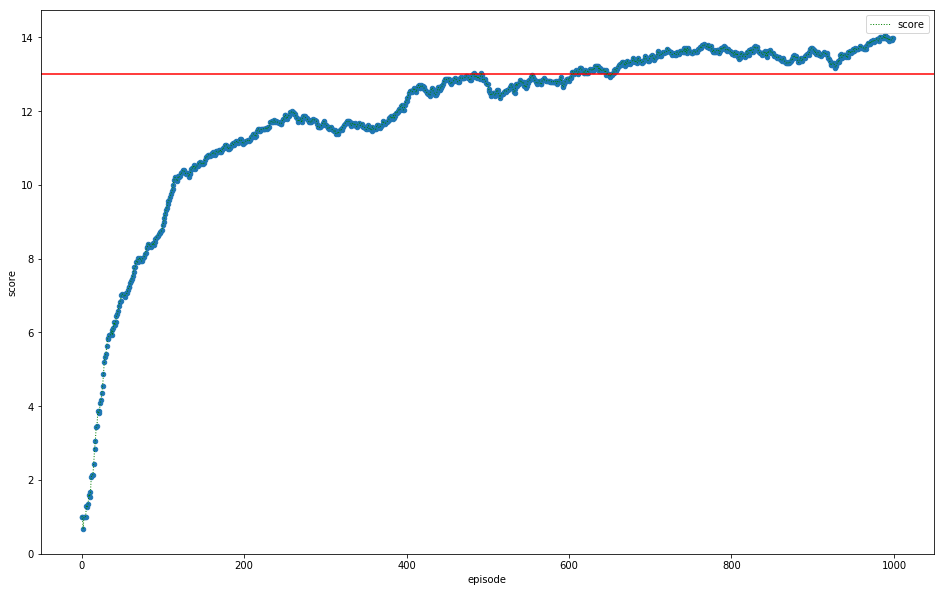

In [18]:
df = pd.DataFrame(score, columns=["score"])
df['episode'] = df.index
ax = df.plot(x ='episode', y='score', kind = 'scatter', style='g', linewidth=1.0, figsize=(16,10))
ax.axhline(13, color='r')
df.plot.line(x ='episode', y='score', ax=ax, style=':g', linewidth=1.0)
